# Nomenclature

In [ ]:
# Nomenclautre for the key variables

#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#.........................................................................................................................

# Main dataset with the original data
# df_spy = pd.read_csv("/content/drive/MyDrive/Data/Final database.csv", encoding='utf-8')

# Dataset df_spy with selected columns
# df_spy_cols = df_spy.iloc[0:,:27]

# Dataset df_spy_cols filtered for Nordic countries
# nc_df_spy_cols = df_spy_cols[df_spy_cols['Country'].isin(Nordic_Country_list)]

# Cleaned dataset without missing values and unnecessary columns
# clean_spy = nc_df_spy_cols.dropna()

# Define the seed for random number generator for reproducibility
# seed = 42

# DataFrame variable that contains the loaded data file
# df_spy = pd.read_csv("/content/drive/MyDrive/Data/Final database.csv", encoding='utf-8')

# DataFrame that contains the count of missing values per column in df_spy
# nulls = df_spy.isnull().sum().to_frame()

# DataFrame df_spy_cols with only selected columns
# df_spy_cols = df_spy.iloc[0:,:27]

# List of Nordic countries
# Nordic_Country_list = ["Finland", "Norway", "Denmark", "Sweden"]

# DataFrame df_spy_cols filtered for Nordic countries
# nc_df_spy_cols = df_spy_cols[df_spy_cols['Country'].isin(Nordic_Country_list)]

# DataFrame df_genre_vs_popularity including only the different genres and the popularity score
# df_genre_vs_popularity

#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#.........................................................................................................................



# Libaries

In [ ]:
#libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.rc("font", size = 14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the seed
seed = 42

In [ ]:
#Place holder list
MAE_model_list = [None]*4
MSE_model_list = [None]*4
RMSE_model_list =[None]*4
RSQ_model_list = [None]*4

# Open the data set

In [ ]:
#The data frame is called through google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Open the file
# Calling the dataset " Final database" through google colab. This code wont work for the Examiner due to the missing connection to our google drive folder.

df_spy = pd.read_csv("/content/drive/MyDrive/Data/Final database.csv", encoding='utf-8')

<ipython-input-5-b18fd46bc304>:4: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_spy = pd.read_csv("/content/drive/MyDrive/Data/Final database.csv", encoding='utf-8')


In [ ]:
#Using the info command to check the dataset.

print(df_spy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB
None


In [ ]:
#Using the head function to see if the right dataset has been loaded.

df_spy.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


# Cleaning the data set

In [ ]:
#This function calls the dataset and goes through each column to count the amount of NaN. This is done because the function isnull() only displays max 10.Collumns with NaN. However our dataset has 151 columns.

nulls = df_spy.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Country 0
Uri 0
Popularity 0
Title 0
Artist 0
Album/Single 0
Genre 0
Artist_followers 41
Explicit 0
Album 0
Release_date 0
Track_number 0
Tracks_in_album 0
danceability 0
energy 0
key 0
loudness 0
mode 0
speechiness 0
acoustics 0
instrumentalness 0
liveliness 0
valence 0
tempo 0
duration_ms 0
time_signature 0
Genre_new 0
Days_since_release 3222
Released_after_2017 3222
Explicit_false 0
Explicit_true 0
album 0
compilation 0
single 0
bolero 0
boy band 0
country 0
dance/electronic 0
else 0
funk 0
hip hop 0
house 0
indie 0
jazz 0
k-pop 0
latin 0
metal 0
opm 0
pop 0
r&b/soul 0
rap 0
reggae 0
reggaeton 0
rock 0
trap 0
syuzhet_norm 98767
bing_norm 98767
afinn_norm 98767
nrc_norm 98767
syuzhet 98767
bing 98767
afinn 98767
nrc 98767
anger 98767
anticipation 98767
disgust 98767
fear 98767
joy 98767
sadness 98767
surprise 98767
trust 98767
negative 98767
positive 98767
n_words 98767
anger_norm 98767
anticipation_norm 98767
disgust_norm 98767
fear_norm 98767
joy_norm 98767
sadness_norm 98767
surpr

In [ ]:
# Dropping the boolean columns and null values columns
df_spy_cols = df_spy.iloc[0:,:27]

In [ ]:
# Filter rows with Nordic countries.

# list of Nordic countries
Nordic_Country_list = ["Finland", "Norway", "Denmark", "Sweden"]

# Create a new DataFrame that only includes rows where 'Country' is in 'Nordic_Country_list'

# Code option 1
nc_df_spy_cols = df_spy_cols[df_spy_cols['Country'].isin(Nordic_Country_list)]



In [ ]:
print(nc_df_spy_cols.head())
print("-------------------------------------------------------")
print(nc_df_spy_cols.info())

    Country                                                Uri  Popularity  \
25  Finland  https://open.spotify.com/track/5xhJmd0I15jFcEd...       55.20   
32   Norway  https://open.spotify.com/track/5xhJmd0I15jFcEd...       63.20   
36   Sweden  https://open.spotify.com/track/5xhJmd0I15jFcEd...      187.85   
51   Norway  https://open.spotify.com/track/0wJJhRgdHhT93Z3...       74.40   
54   Sweden  https://open.spotify.com/track/0wJJhRgdHhT93Z3...       69.60   

              Title                     Artist Album/Single      Genre  \
25  it wont kill ya  The Chainsmokers - Louane        album  dance pop   
32  it wont kill ya  The Chainsmokers - Louane        album  dance pop   
36  it wont kill ya  The Chainsmokers - Louane        album  dance pop   
51             hymn                      Kesha       single  dance pop   
54             hymn                      Kesha       single  dance pop   

   Artist_followers Explicit                   Album  ... mode speechiness  \
25      

## Converting the variables

In [ ]:
# Convert the variables to float64

In [ ]:
# save intermediary file : NOPE
# nc_df_spy_cols.to_csv('spotify-intermediary-dataset.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
# List of columns that should be numeric
numeric_columns = ['Tracks_in_album','danceability', 'energy', 'key', 'loudness', 'mode',
                   'speechiness', 'acoustics', 'instrumentalness',
                   'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Attempt to convert these columns to numeric values
for col in numeric_columns:
    nc_df_spy_cols[col] = pd.to_numeric(nc_df_spy_cols[col], errors='coerce')

# Check the data types again
print(nc_df_spy_cols.info())
# PS: the above command drops the nulls


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25061 entries, 25 to 164446
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           25061 non-null  object 
 1   Uri               25061 non-null  object 
 2   Popularity        25061 non-null  float64
 3   Title             25061 non-null  object 
 4   Artist            25061 non-null  object 
 5   Album/Single      25061 non-null  object 
 6   Genre             25061 non-null  object 
 7   Artist_followers  25054 non-null  object 
 8   Explicit          25061 non-null  object 
 9   Album             25061 non-null  object 
 10  Release_date      25061 non-null  object 
 11  Track_number      25061 non-null  object 
 12  Tracks_in_album   25061 non-null  int64  
 13  danceability      25058 non-null  float64
 14  energy            25058 non-null  float64
 15  key               25058 non-null  float64
 16  loudness          25058 non-null  floa

<ipython-input-12-b04a7df3523c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_df_spy_cols[col] = pd.to_numeric(nc_df_spy_cols[col], errors='coerce')


In [ ]:
nc_df_spy_cols.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new
25,Finland,https://open.spotify.com/track/5xhJmd0I15jFcEd...,55.20,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop
32,Norway,https://open.spotify.com/track/5xhJmd0I15jFcEd...,63.20,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop
36,Sweden,https://open.spotify.com/track/5xhJmd0I15jFcEd...,187.85,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop
51,Norway,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,74.40,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,...,1.0,0.0760,0.1470,0.000000,0.305,0.38,67.037,205600.0,4.0,pop
54,Sweden,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,69.60,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,...,1.0,0.0760,0.1470,0.000000,0.305,0.38,67.037,205600.0,4.0,pop


In [ ]:
nulls = nc_df_spy_cols.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Country 0
Uri 0
Popularity 0
Title 0
Artist 0
Album/Single 0
Genre 0
Artist_followers 7
Explicit 0
Album 0
Release_date 0
Track_number 0
Tracks_in_album 0
danceability 3
energy 3
key 3
loudness 3
mode 3
speechiness 3
acoustics 3
instrumentalness 3
liveliness 3
valence 3
tempo 3
duration_ms 3
time_signature 3
Genre_new 0


In [ ]:
nc_df_spy_cols_genre=nc_df_spy_cols

In [ ]:
# Columns to drop
cols_to_drop = ['Country','Uri', 'Album/Single', 'Genre', 'Artist_followers', 'Explicit',
                'Title', 'Artist', 'Album', 'Release_date', 'Genre_new', 'Track_number']

# Remove the columns we don't want to use
nc_df_spy_cols = nc_df_spy_cols.drop(columns=cols_to_drop)

In [ ]:
clean_spy = nc_df_spy_cols.dropna()

nulls = clean_spy.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Popularity 0
Tracks_in_album 0
danceability 0
energy 0
key 0
loudness 0
mode 0
speechiness 0
acoustics 0
instrumentalness 0
liveliness 0
valence 0
tempo 0
duration_ms 0
time_signature 0


# Descriptive statistics

In [ ]:
def format_with_commas(x):
    return '{:,.2f}'.format(x)
clean_spy.describe().applymap (format_with_commas)

,Popularity,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
count,"25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00","25,058.00"
mean,"4,219.40",7.18,0.65,0.64,5.29,-6.70,0.56,0.11,0.22,0.02,0.18,0.48,119.98,"201,586.31",3.96
std,"10,068.57",8.36,0.15,0.18,3.63,2.67,0.50,0.10,0.25,0.10,0.13,0.22,27.59,"46,899.68",0.32
min,0.80,1.00,0.06,0.01,0.00,-36.44,0.00,0.02,0.00,0.00,0.01,0.03,34.10,"30,133.00",1.00
25%,69.60,1.00,0.56,0.54,2.00,-7.79,0.00,0.04,0.03,0.00,0.10,0.32,99.92,"176,665.50",4.00
50%,416.43,2.00,0.67,0.66,6.00,-6.25,1.00,0.06,0.12,0.00,0.13,0.47,118.97,"197,573.00",4.00
75%,"3,146.46",13.00,0.76,0.77,8.00,-5.00,1.00,0.13,0.32,0.00,0.22,0.65,138.00,"221,176.00",4.00
max,"156,887.25",349.00,0.98,1.00,11.00,0.17,1.00,0.97,1.00,0.99,0.99,0.98,216.33,"1,787,030.00",5.00


[Text(0.5, 1.0, 'Heatmap Popularity')]

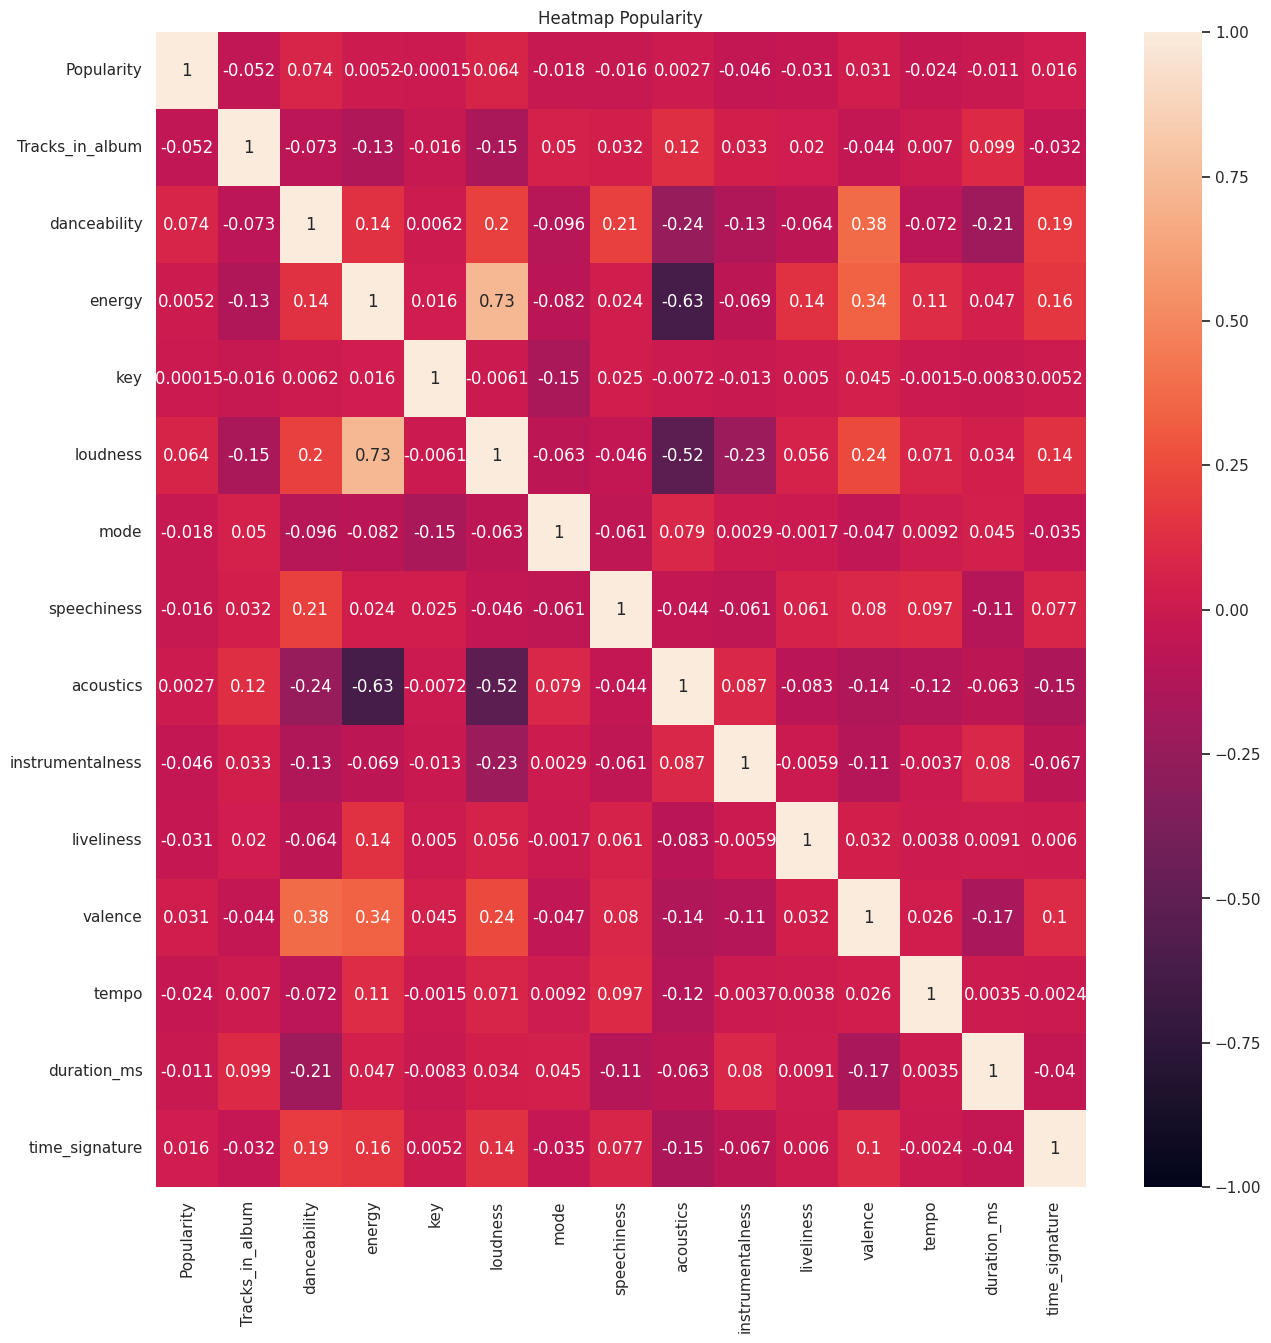

In [ ]:
correlations = clean_spy.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmin=-1 , vmax =1, annot=True).set(title='Heatmap Popularity')

In [ ]:
# X (feature/column) names
X_cols = ['Tracks_in_album', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acoustics', 'instrumentalness',
              'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [ ]:
# Scale the entire dataframe -> makes it an array
clean_spy_scaled = scaler.fit_transform(clean_spy)
# Transform it back into a dataframe
clean_spy_scaled = pd.DataFrame(clean_spy_scaled, columns=['Popularity', 'Tracks_in_album', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acoustics', 'instrumentalness',
              'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature'])
# Extract the X variables
X_scaled_df = clean_spy_scaled[X_cols]
# Extract the y variable
y_scaled = clean_spy_scaled['Popularity']

In [ ]:
X_scaled_df.describe()

,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
count,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04,2.505800e+04
mean,2.949016e-17,-6.811093e-16,-2.608745e-17,3.408028e-17,2.155050e-17,2.707991e-17,8.832870e-17,2.438609e-17,-8.223218e-18,-4.196677e-17,1.775081e-16,3.045426e-16,2.608745e-17,-2.937674e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-7.398692e-01,-4.059806e+00,-3.572466e+00,-1.459805e+00,-1.115408e+01,-1.119471e+00,-8.124215e-01,-8.880821e-01,-1.772143e-01,-1.234232e+00,-2.094955e+00,-3.113307e+00,-3.655819e+00,-9.153311e+00
25%,-7.398692e-01,-6.105679e-01,-5.806656e-01,-9.081527e-01,-4.098680e-01,-1.119471e+00,-6.416299e-01,-7.548665e-01,-1.772143e-01,-6.158609e-01,-7.579361e-01,-7.270266e-01,-5.313747e-01,1.290347e-01
50%,-6.202007e-01,1.120377e-01,1.046897e-01,1.951522e-01,1.669953e-01,8.932793e-01,-4.326726e-01,-3.985374e-01,-1.772143e-01,-3.935020e-01,-3.856686e-02,-3.664573e-02,-8.557387e-02,1.290347e-01
75%,6.961528e-01,7.038861e-01,7.282507e-01,7.468046e-01,6.384801e-01,8.932793e-01,2.419067e-01,4.080183e-01,-1.766346e-01,3.033601e-01,7.495319e-01,6.534813e-01,4.177018e-01,1.290347e-01
max,4.090477e+01,2.272973e+00,2.009079e+00,1.574283e+00,2.578140e+00,8.932793e-01,8.189919e+00,3.108576e+00,9.789452e+00,6.065585e+00,2.284492e+00,3.493055e+00,3.380567e+01,3.223150e+00


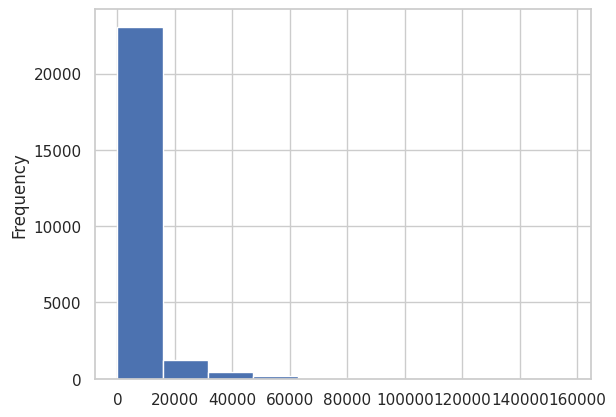

In [ ]:
clean_spy.Popularity.plot(kind = "hist",)
fig.savefig('hist_popularity.png')

# Linear regression machine learning

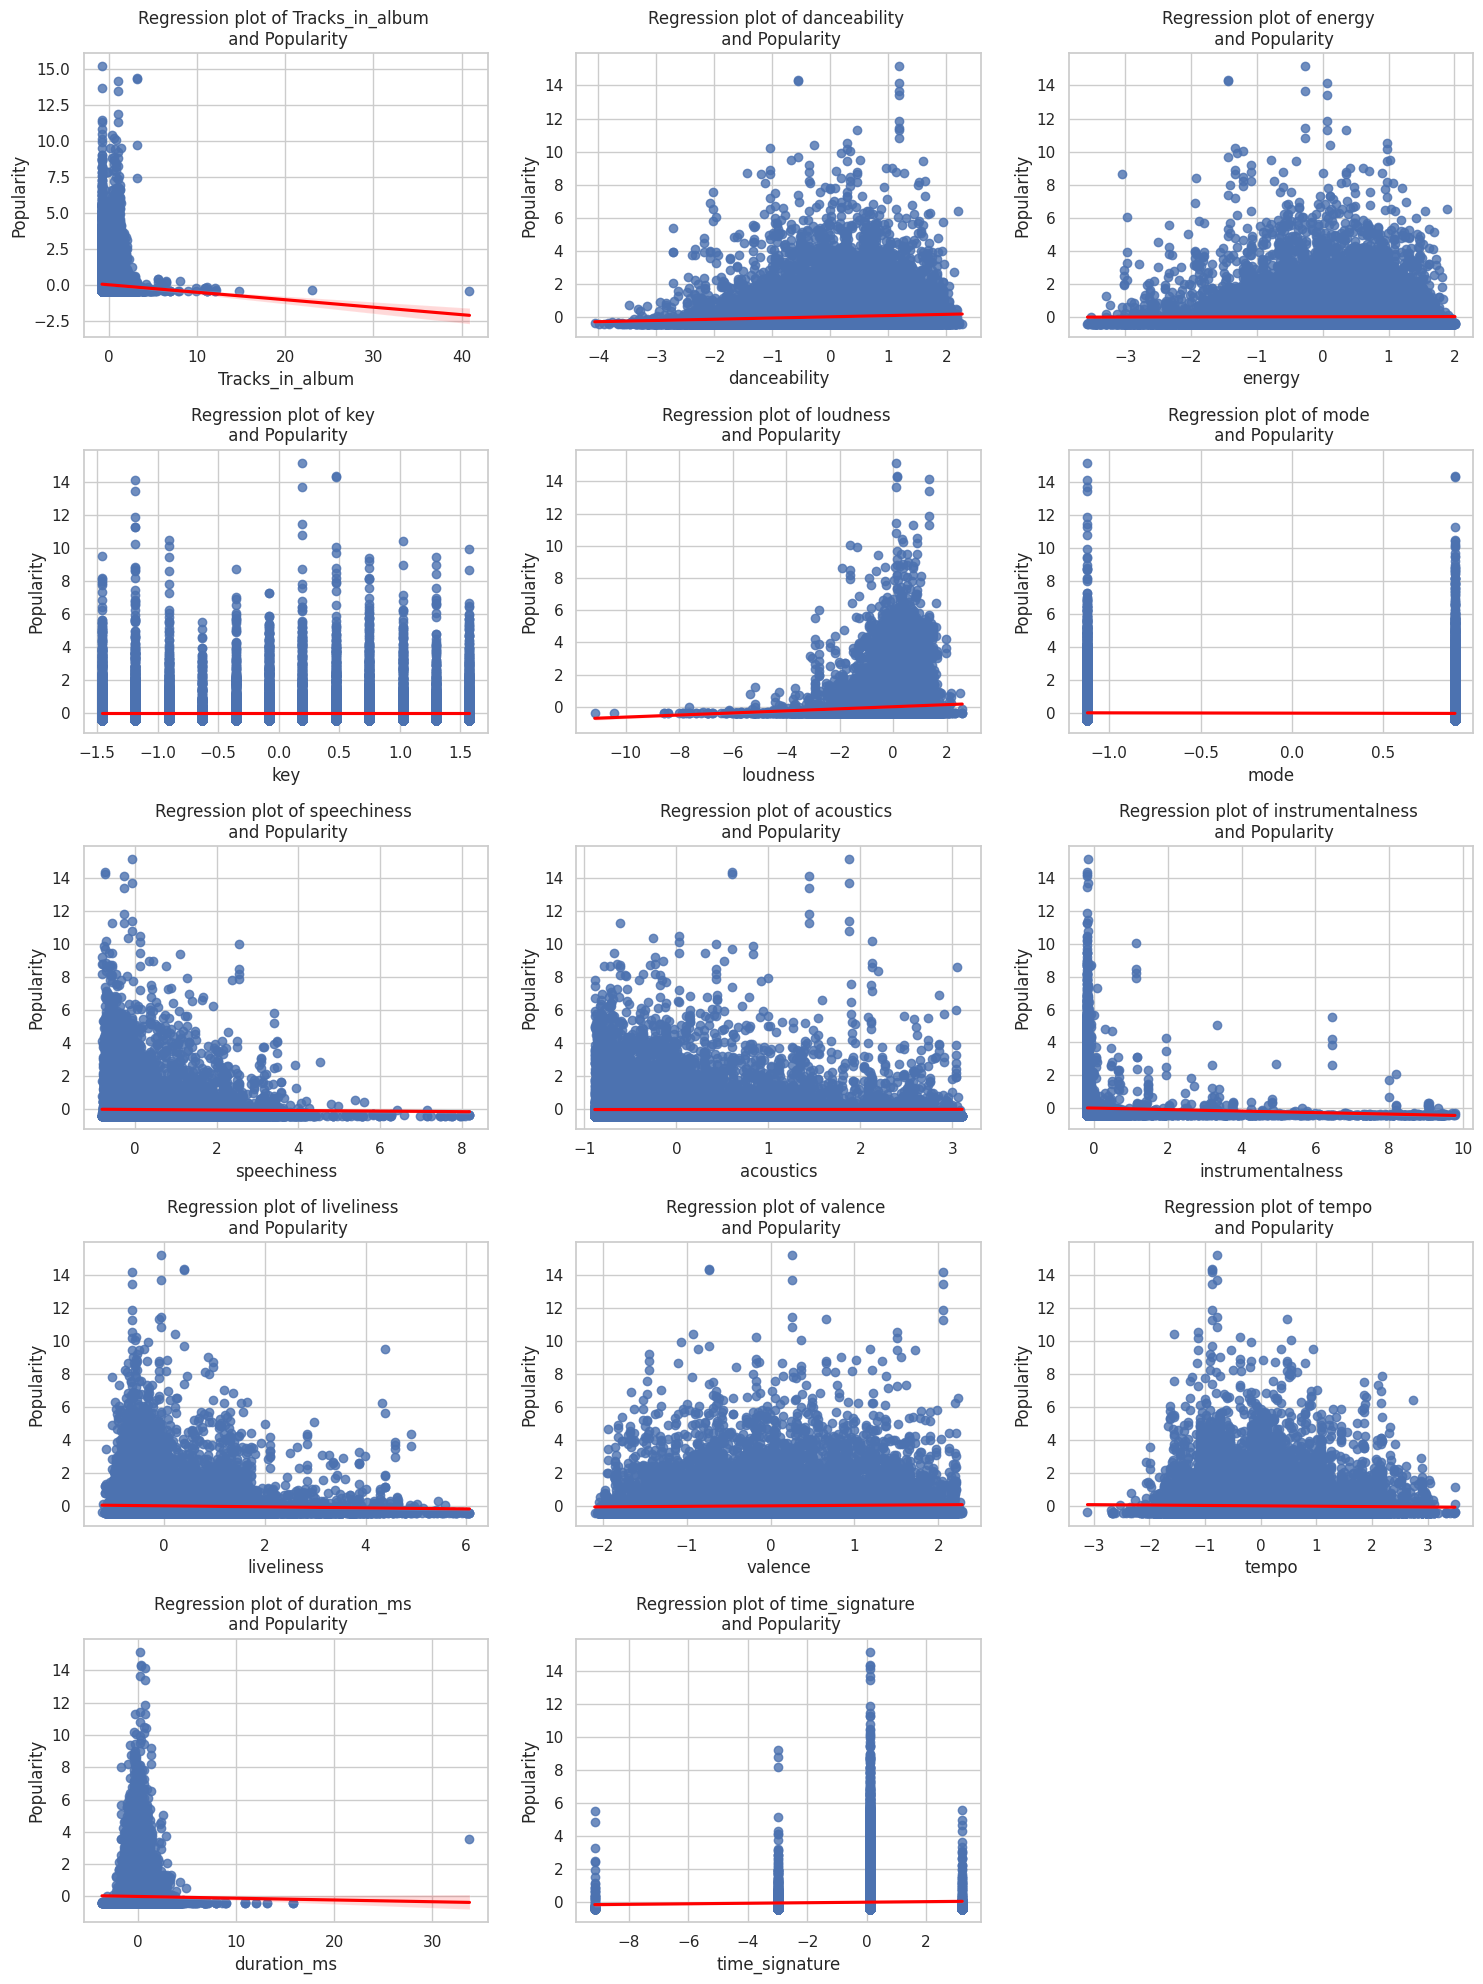

In [ ]:
variables = ['Tracks_in_album', 'danceability', 'energy', 'key', 'loudness', 'mode',
              'speechiness', 'acoustics', 'instrumentalness',
              'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Calculate the total number of plots
num_plots = len(variables)

# Set the size of the grid
num_rows = 5
num_cols = 3

# Create the figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Iterate over the variables and assign them to the subplots
for i, var in enumerate(variables):
    # Calculate the row and column indices for the current plot
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Assign the plot to the corresponding subplot
    ax = axs[row_idx, col_idx]

    # Plot the data on the current subplot
    sns.regplot(x=var, y='Popularity', data=clean_spy_scaled, line_kws={"color": "red"}, ax=ax)

    # Optional: Customize the subplot appearance
    ax.set_title(f'Regression plot of {var} \n and Popularity')
    ax.grid(True)

# Optional: Remove empty subplots if the number of plots is less than the total number of subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axs[row_idx, col_idx])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()

# Save the figure
fig.savefig('regression-plot_grid.png')

In [ ]:
# Creating the objects for the ML multivariate regression

In [ ]:
y = clean_spy_scaled['Popularity']

In [ ]:
X = clean_spy_scaled[X_cols]

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
print(X_train)

       Tracks_in_album  danceability    energy       key  loudness      mode  \
13924        -0.021858      1.027338 -0.226753  0.746805 -0.103576 -1.119471   
18648         0.337147      0.703886 -0.535724 -1.459805  0.533195  0.893279   
24324        -0.739869      1.034220  0.188955 -1.183979 -0.337209  0.893279   
19344        -0.739869      0.407962  0.329396  1.022631  0.733077 -1.119471   
22233        -0.739869     -0.472929  0.155249 -0.908153  0.383565  0.893279   
...                ...           ...       ...       ...       ...       ...   
21575        -0.739869      0.008808  1.261929  0.746805  0.865832 -1.119471   
5390          0.456816     -0.280234  1.789990  1.022631  0.807330  0.893279   
860          -0.739869      0.077628 -0.659313 -0.908153  0.570697  0.893279   
15795        -0.500532      0.662594  0.587809 -0.080674 -0.184579  0.893279   
23654        -0.739869     -1.801147  0.851839  0.195152  0.732702 -1.119471   

       speechiness  acoustics  instrume

In [ ]:
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
feature_names = X.columns
model_coefficients_lr = regressor_lr.coef_

coefficients_df = pd.DataFrame(data = model_coefficients_lr,
                               index = feature_names,
                               columns = ['Coefficients value'])
print(coefficients_df)
coefficients_df.to_csv('lr-coefficients.csv')

                  Coefficients value
Tracks_in_album            -0.037701
danceability                0.066914
energy                     -0.061393
key                        -0.001594
loudness                    0.103903
mode                       -0.009758
speechiness                -0.017766
acoustics                   0.041350
instrumentalness           -0.020887
liveliness                 -0.025096
valence                     0.008864
tempo                      -0.013190
duration_ms                 0.016109
time_signature              0.002766


In [ ]:
y_pred_lr = regressor_lr.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lr})
print(results)

         Actual  Predicted
9403  -0.417963  -0.118519
24972 -0.370537  -0.213374
14713 -0.042336  -0.201051
8743  -0.365372  -0.129592
752   -0.417645   0.055755
...         ...        ...
24451 -0.409113  -0.208626
6225  -0.415659   0.016052
8570   1.087202  -0.048481
3214  -0.324924   0.001322
8145  -0.387163  -0.315876

[5012 rows x 2 columns]
0.014008304560712448


In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'Mean absolute error:{mae_lr:.2f}')
print(f'Mean squared error:{mse_lr:.2f}')
print(f'Root mean squared error:{rmse_lr:.2f}')

MAE_model_list [0] = mae_lr
MSE_model_list  [0] = mse_lr
RMSE_model_list [0] = rmse_lr

Mean absolute error:0.55
Mean squared error:0.97
Root mean squared error:0.99


In [ ]:
# This is the accuracy score
r_squared = r2_score(y_test, y_pred_lr)
print(r_squared)

0.014008304560712448


# Decision Tree Regression

In [ ]:
regressor_dtr = DecisionTreeRegressor(random_state = seed, max_depth=3)
regressor_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
y_pred_dtr = regressor_dtr.predict(X_test)

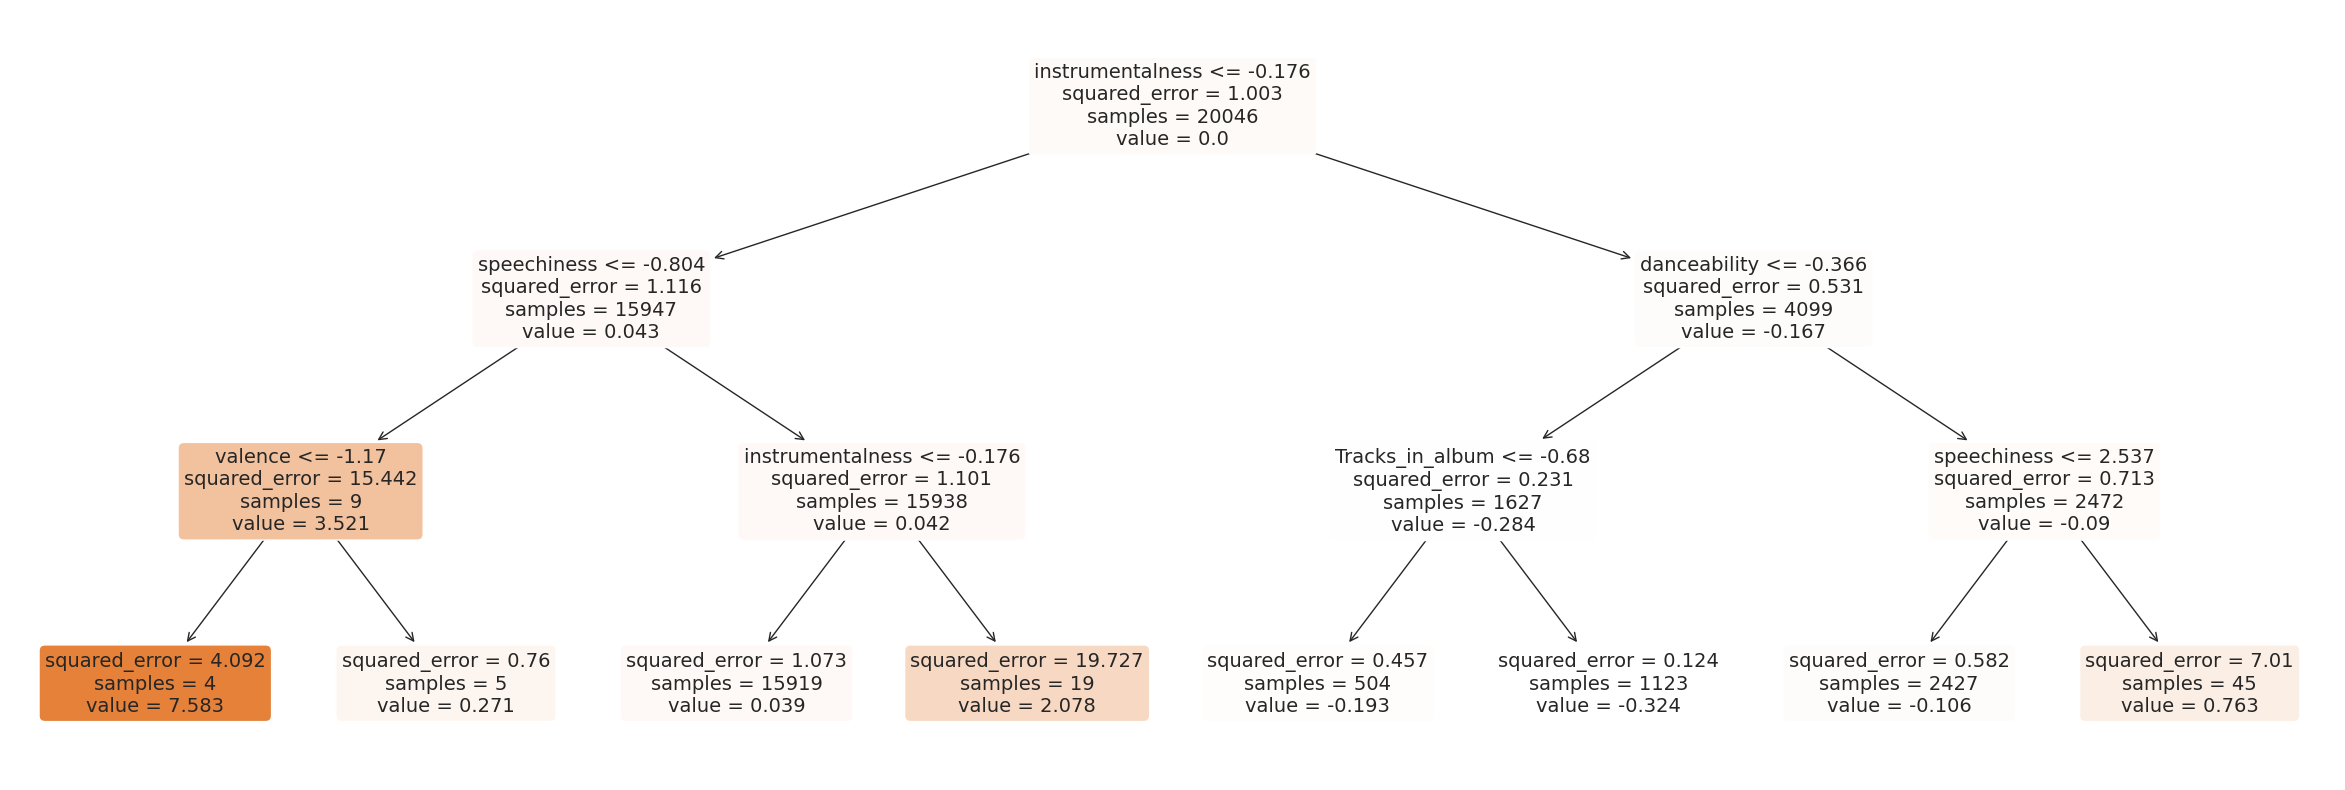

In [ ]:
plt.figure(figsize=(30,10))
a = tree.plot_tree(regressor_dtr,
              feature_names = feature_names,
              rounded=True,
              filled=True,
              fontsize=14)
fig.savefig('dtr_depth3.png')

In [ ]:
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
print(f'Mean absolute error:{mae_dtr:.2f}')
print(f'Mean squared error:{mse_dtr:.2f}')
print(f'Root mean squared error:{rmse_dtr:.2f}')

MAE_model_list[1] = mae_dtr
MSE_model_list[1] = mse_dtr
RMSE_model_list[1] = rmse_dtr

Mean absolute error:0.55
Mean squared error:0.97
Root mean squared error:0.99


In [ ]:
r_squared_dtr = r2_score(y_test, y_pred_dtr)
print(r_squared_dtr)

0.012772866321214216


In [ ]:
# figure of the tree
tree_rules

In [ ]:
# Initialize lists to store results for different tree depths
list_depth_dtr = []
list_mae_dtr_out = []
list_mse_dtr_out = []
list_rmse_dtr_out = []

# Loop through different possible depths for the decision tree
for i in range(1,50,1):
  regressor_dtr = DecisionTreeRegressor(random_state = seed, max_depth=i)
  regressor_dtr.fit(X_train, y_train)
  y_pred_dtr = regressor_dtr.predict(X_test)
  # Append the results to the lists
  list_mae_dtr_out.append(mean_absolute_error(y_test, y_pred_dtr))
  list_mse_dtr_out.append(mean_squared_error(y_test, y_pred_dtr))
  list_rmse_dtr_out.append(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
  list_depth_dtr.append(i)


In [ ]:
# Create a dataframe with the results and display the head of the dataframe
dtr_depth_results = pd.DataFrame({"Depth":list_depth_dtr, "MAE":list_mae_dtr_out,
                                  "MSE":list_mse_dtr_out, "RMSE":list_rmse_dtr_out})
dtr_depth_results.head()

,Depth,MAE,MSE,RMSE
0,1,0.549746,0.982095,0.991007
1,2,0.548143,0.986725,0.993341
2,3,0.548867,0.974816,0.987328
3,4,0.544509,0.979727,0.989812
4,5,0.540195,0.933885,0.966377


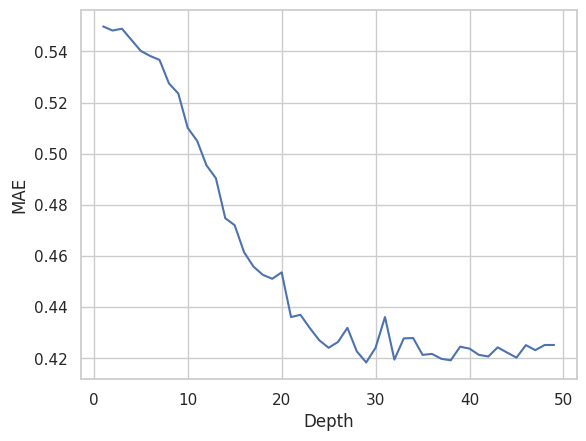

In [ ]:
# Visualize the Mean Absolute Error and Root Mean Squared Error for different depths
sns.lineplot(data=dtr_depth_results, x='Depth', y='MAE')
plt.show()
fig.savefig('depth_mae.png')

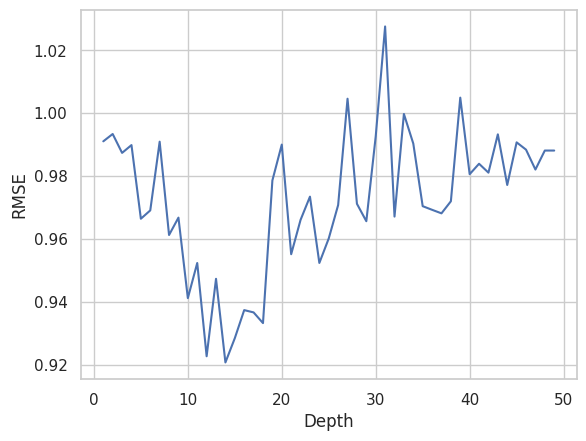

In [ ]:
sns.lineplot(data=dtr_depth_results, x='Depth', y='RMSE')
plt.show()
fig.savefig('depth_rmse.png')

# Random Forest Regression

In [ ]:
#instantiate the Regressor
rfr = RandomForestRegressor(n_estimators=200, random_state=seed, max_depth=20)
#fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# predict the test results
y_pred_rfr = rfr.predict(X_test)

In [ ]:
# compare actual and predicted
results_rfr = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rfr})
print(results_rfr)

         Actual  Predicted
9403  -0.417963  -0.276142
24972 -0.370537  -0.068991
14713 -0.042336  -0.392473
8743  -0.365372  -0.327388
752   -0.417645  -0.042018
...         ...        ...
24451 -0.409113  -0.174052
6225  -0.415659  -0.255563
8570   1.087202   0.610177
3214  -0.324924  -0.202455
8145  -0.387163  -0.191347

[5012 rows x 2 columns]


In [ ]:
# Calculate and print the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print(f'Mean absolute error:{mae_rfr:.2f}')
print(f'Mean squared error:{mse_rfr:.2f}')
print(f'Root mean squared error:{rmse_rfr:.2f}')

Mean absolute error:0.42
Mean squared error:0.60
Root mean squared error:0.77


In [ ]:
r_squared_rfr = r2_score(y_test, y_pred_rfr)
print(r_squared_rfr)

0.3933729748800926


In [ ]:
feature_scores = pd.Series(rfr.feature_importances_, index=['Tracks_in_album', 'danceability', 'energy',
                                                            'key', 'loudness', 'mode', 'speechiness',
                                                            'acoustics', 'instrumentalness', 'liveliness',
                                                            'valence', 'tempo', 'duration_ms', 'time_signature']).sort_values(ascending=False)
feature_scores

acoustics           0.115340
speechiness         0.100284
loudness            0.098428
tempo               0.097260
valence             0.093670
duration_ms         0.087661
danceability        0.084094
liveliness          0.079191
energy              0.075154
instrumentalness    0.062350
Tracks_in_album     0.054527
key                 0.038119
mode                0.007618
time_signature      0.006305
dtype: float64

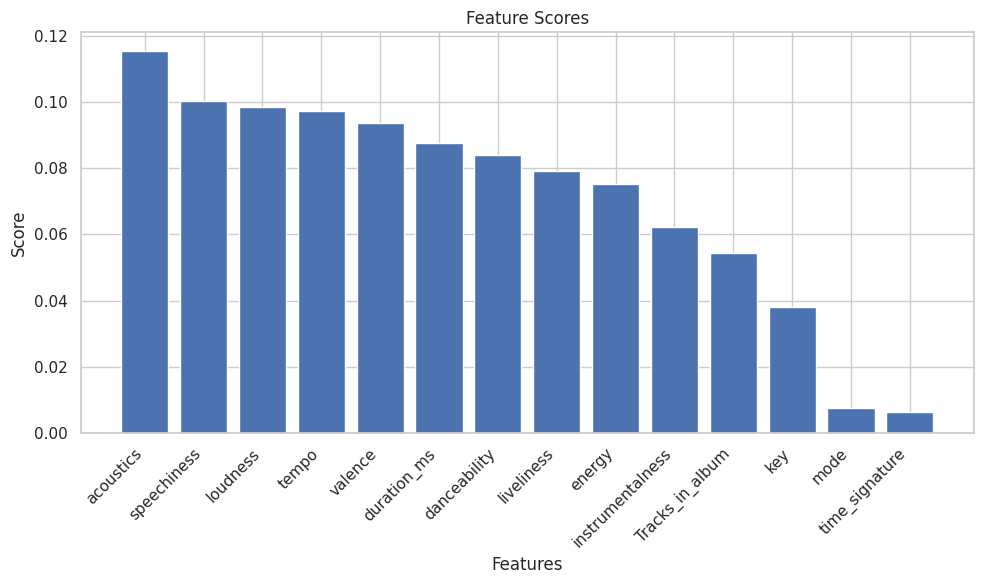

In [ ]:
feature_scores = pd.Series(rfr.feature_importances_, index=['Tracks_in_album', 'danceability', 'energy',
'key', 'loudness', 'mode', 'speechiness',
'acoustics', 'instrumentalness', 'liveliness',
'valence', 'tempo', 'duration_ms', 'time_signature']).sort_values(ascending=False)
feature_scores

plt.figure(figsize=(10, 6))
plt.bar(feature_scores.index, feature_scores.values)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('feature_selection.png')

#Feature Selection - Random Forest

In [ ]:
#Remove the features with the two worst scores:
# Columns to drop
cols_to_drop2 = ['mode','time_signature']

# Remove the columns we don't want to use
clean_spy_features2 = clean_spy_scaled.drop(columns=cols_to_drop2)

In [ ]:
y2 = clean_spy_features2['Popularity']

In [ ]:
x2 = clean_spy_features2[['Tracks_in_album', 'danceability', 'energy', 'key', 'loudness',
              'speechiness', 'acoustics', 'instrumentalness',
              'liveliness', 'valence', 'tempo', 'duration_ms']]

In [ ]:
# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=seed)

In [ ]:
rfr2 = RandomForestRegressor(n_estimators=200, random_state=seed, max_depth=20)
#fit the model
rfr2.fit(X2_train, y2_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# predict the test results
y2_pred_rfr = rfr2.predict(X2_test)

In [ ]:
mae_rfr2 = mean_absolute_error(y2_test, y2_pred_rfr)
mse_rfr2 = mean_squared_error(y2_test, y2_pred_rfr)
rmse_rfr2 = np.sqrt(mse_rfr2)
print(f'Mean absolute error:{mae_rfr2:.2f}')
print(f'Mean squared error:{mse_rfr2:.2f}')
print(f'Root mean squared error:{rmse_rfr2:.2f}')

Mean absolute error:0.43
Mean squared error:0.60
Root mean squared error:0.77


In [ ]:
r_squared_rfr2 = r2_score(y_test, y2_pred_rfr)
print(r_squared_rfr)

0.3933729748800926


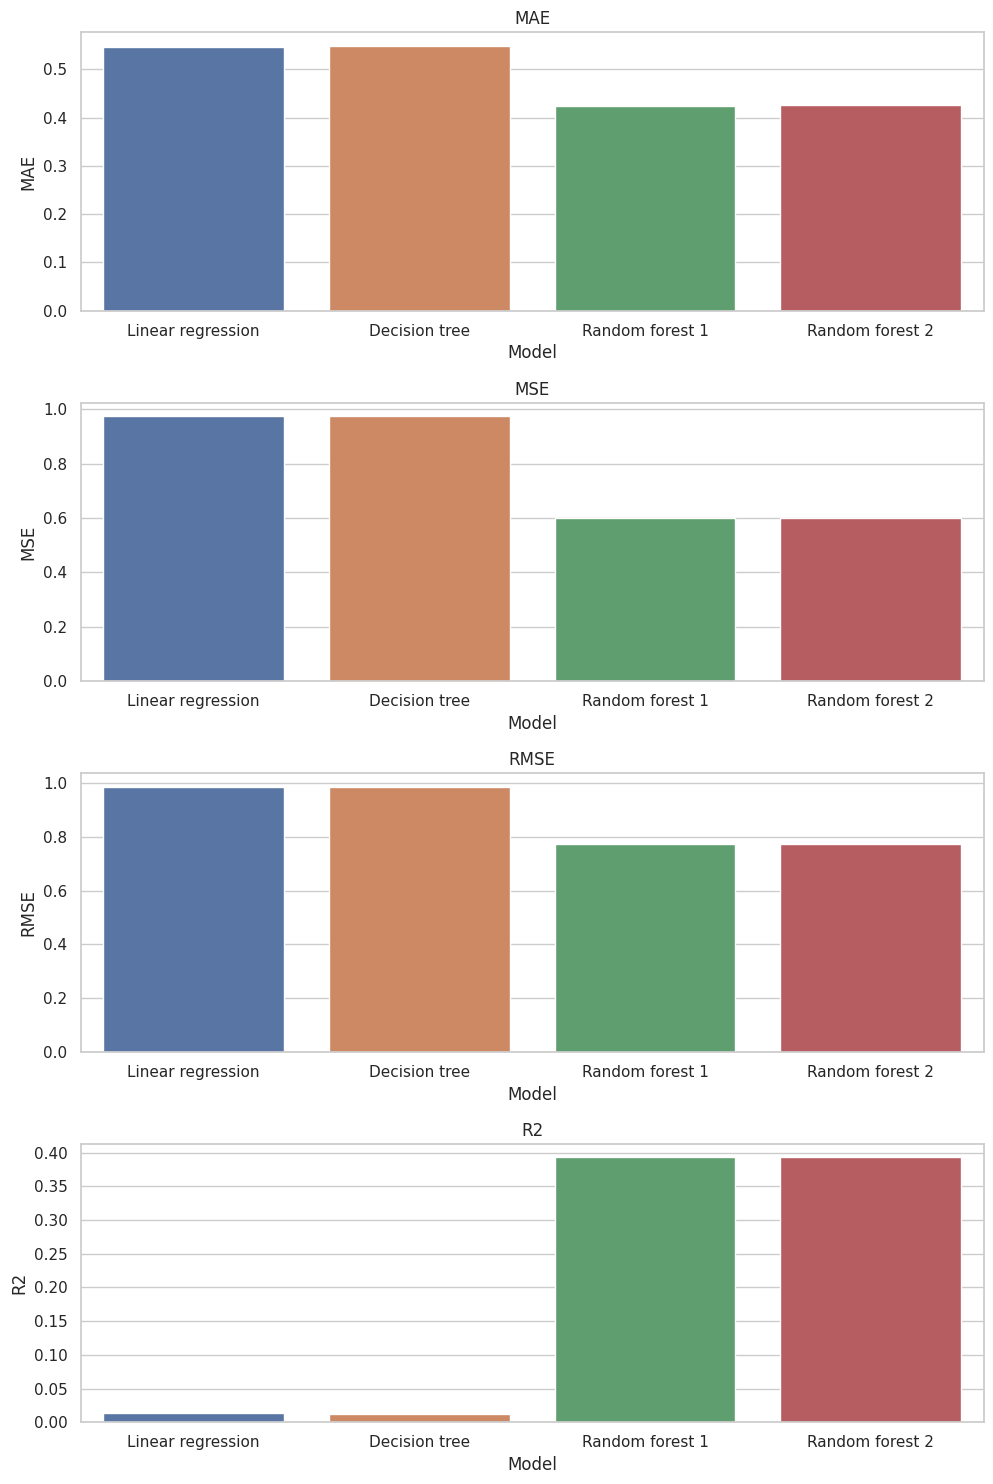

In [ ]:
#------------------------------
MAE_model_list [0] = mae_lr
MSE_model_list  [0] = mse_lr
RMSE_model_list [0] = rmse_lr
RSQ_model_list[0] = r_squared

MAE_model_list[1] = mae_dtr
MSE_model_list[1] = mse_dtr
RMSE_model_list[1] = rmse_dtr
RSQ_model_list[1] = r_squared_dtr

MAE_model_list[2] = mae_rfr
MSE_model_list[2] = mse_rfr
RMSE_model_list[2] = rmse_rfr
RSQ_model_list[2] = r_squared_rfr

MAE_model_list[3] = mae_rfr2
MSE_model_list[3] = mse_rfr2
RMSE_model_list[3] = rmse_rfr2
RSQ_model_list[3] = r_squared_rfr2


fig, axs = plt.subplots(4, 1, figsize=(10,15)) # endre størrelsen på figuren

Model_list = ['Linear regression', 'Decision tree','Random forest 1','Random forest 2']

Stat_MAE = pd.DataFrame({'MAE':MAE_model_list,'Model':Model_list})
Stat_MSE = pd.DataFrame({'MSE':MSE_model_list,'Model':Model_list})
Stat_RMSE = pd.DataFrame({'RMSE':RMSE_model_list,'Model':Model_list})
Stat_R2 = pd.DataFrame({'R2':RSQ_model_list,'Model':Model_list})

sns.barplot(x = "Model", y = "MAE", data =Stat_MAE, ax=axs[0])
axs[0].tick_params(axis='x', rotation=0) # roter x-aksen etikettene
axs[0].set_title('MAE') # legg til tittel for å skille plottene

sns.barplot(x = "Model", y = "MSE", data =Stat_MSE, ax=axs[1])
axs[1].tick_params(axis='x', rotation=0) # roter x-aksen etikettene
axs[1].set_title('MSE') # legg til tittel for å skille plottene

sns.barplot(x = "Model", y = 'RMSE', data =Stat_RMSE, ax=axs[2])
axs[2].tick_params(axis='x', rotation=0) # roter x-aksen etikettene
axs[2].set_title('RMSE') # legg til tittel for å skille plottene

sns.barplot(x = "Model", y = 'R2', data =Stat_R2, ax=axs[3])
axs[3].tick_params(axis='x', rotation=0) # roter x-aksen etikettene
axs[3].set_title('R2') # legg til tittel for å skille plottene

plt.tight_layout()

# Genre vs popularity

In this Chapter an investigation has been done to detect if there is a colleration between popularity and genre to justify the step of droping the genres in the beginning.

In [ ]:
#Once again the dataset is called once again.
nc_df_spy_cols_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25061 entries, 25 to 164446
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           25061 non-null  object 
 1   Uri               25061 non-null  object 
 2   Popularity        25061 non-null  float64
 3   Title             25061 non-null  object 
 4   Artist            25061 non-null  object 
 5   Album/Single      25061 non-null  object 
 6   Genre             25061 non-null  object 
 7   Artist_followers  25054 non-null  object 
 8   Explicit          25061 non-null  object 
 9   Album             25061 non-null  object 
 10  Release_date      25061 non-null  object 
 11  Track_number      25061 non-null  object 
 12  Tracks_in_album   25061 non-null  int64  
 13  danceability      25058 non-null  float64
 14  energy            25058 non-null  float64
 15  key               25058 non-null  float64
 16  loudness          25058 non-null  floa

In [ ]:
#As it can be seen the dataset has two genre columns. One is called genre and another one is called genre_new
#First the genre column is called and then using the groupby function to investigate how many genres are they.
#As can be seen there are 437 different genres.
nc_df_spy_cols_genre_split = nc_df_spy_cols_genre.groupby('Genre').size().reset_index(name='Times')
print (nc_df_spy_cols_genre_split)

                  Genre  Times
0            a cappella      7
1            acid house      2
2        acoustic chill      5
3          acoustic pop     16
4       adult standards    226
..                  ...    ...
433  venezuelan hip hop      1
434           viral pop     13
435           viral rap     10
436         world chill      1
437        zimdancehall      1

[438 rows x 2 columns]


In [ ]:
# The step above is done again this time with the coloumn Genre_new, showing an exsting of only 18 genres.
#The diffrence between genre and genre_new is that genre_new was introduced by spotify themself to cluster multiply genres under the same term to create a cleaner dataset
nc_df_spy_cols_genre_new = nc_df_spy_cols_genre.groupby('Genre_new').size().reset_index(name='Times')
print (nc_df_spy_cols_genre_new)

           Genre_new  Times
0           boy band    175
1            country     58
2   dance/electronic   1058
3               else   1710
4               funk     31
5            hip hop   3624
6              house   1145
7              indie    685
8               jazz     11
9              k-pop    162
10             latin    105
11             metal    570
12               pop  12058
13          r&b/soul    582
14               rap   2208
15            reggae      6
16         reggaeton      4
17              rock    759
18              trap    110


In [ ]:
#to investigate if there is a correlation between the popularity and the popularity the Genre_new column being a string datatype has to be encoded to a numeric value, this is done by using the One-Hot Encoding
#Encode Genres
# Apply One-Hot Encoding
one_hot_encoded = pd.get_dummies(nc_df_spy_cols_genre['Genre_new'], prefix='Genre_new')

df_genre_vs_popularity = pd.concat([nc_df_spy_cols_genre, one_hot_encoded], axis=1)
#In the a check is done to see if the encoding worked successfully
df_genre_vs_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25061 entries, 25 to 164446
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     25061 non-null  object 
 1   Uri                         25061 non-null  object 
 2   Popularity                  25061 non-null  float64
 3   Title                       25061 non-null  object 
 4   Artist                      25061 non-null  object 
 5   Album/Single                25061 non-null  object 
 6   Genre                       25061 non-null  object 
 7   Artist_followers            25054 non-null  object 
 8   Explicit                    25061 non-null  object 
 9   Album                       25061 non-null  object 
 10  Release_date                25061 non-null  object 
 11  Track_number                25061 non-null  object 
 12  Tracks_in_album             25061 non-null  int64  
 13  danceability                2

In [ ]:
#The next two drop commands are used to create a dataframe to investigate into the popularity vs. the Genre
df_genre_vs_popularity.drop(columns=(df_genre_vs_popularity.columns[3:27]), inplace=True)


In [ ]:
df_genre_vs_popularity.drop(columns=(df_genre_vs_popularity.columns[0:2]), inplace=True)
df_genre_vs_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25061 entries, 25 to 164446
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Popularity                  25061 non-null  float64
 1   Genre_new_boy band          25061 non-null  uint8  
 2   Genre_new_country           25061 non-null  uint8  
 3   Genre_new_dance/electronic  25061 non-null  uint8  
 4   Genre_new_else              25061 non-null  uint8  
 5   Genre_new_funk              25061 non-null  uint8  
 6   Genre_new_hip hop           25061 non-null  uint8  
 7   Genre_new_house             25061 non-null  uint8  
 8   Genre_new_indie             25061 non-null  uint8  
 9   Genre_new_jazz              25061 non-null  uint8  
 10  Genre_new_k-pop             25061 non-null  uint8  
 11  Genre_new_latin             25061 non-null  uint8  
 12  Genre_new_metal             25061 non-null  uint8  
 13  Genre_new_pop               2

In [ ]:
# Checking the data once again
df_genre_vs_popularity.head()

,Popularity,Genre_new_boy band,Genre_new_country,Genre_new_dance/electronic,Genre_new_else,Genre_new_funk,Genre_new_hip hop,Genre_new_house,Genre_new_indie,Genre_new_jazz,Genre_new_k-pop,Genre_new_latin,Genre_new_metal,Genre_new_pop,Genre_new_r&b/soul,Genre_new_rap,Genre_new_reggae,Genre_new_reggaeton,Genre_new_rock,Genre_new_trap
25,55.20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
32,63.20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
36,187.85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
51,74.40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
54,69.60,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Checking the data free of NaN values
nulls = df_genre_vs_popularity.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Popularity 0
Genre_new_boy band 0
Genre_new_country 0
Genre_new_dance/electronic 0
Genre_new_else 0
Genre_new_funk 0
Genre_new_hip hop 0
Genre_new_house 0
Genre_new_indie 0
Genre_new_jazz 0
Genre_new_k-pop 0
Genre_new_latin 0
Genre_new_metal 0
Genre_new_pop 0
Genre_new_r&b/soul 0
Genre_new_rap 0
Genre_new_reggae 0
Genre_new_reggaeton 0
Genre_new_rock 0
Genre_new_trap 0


[Text(0.5, 1.0, 'Genre vs Popularity')]

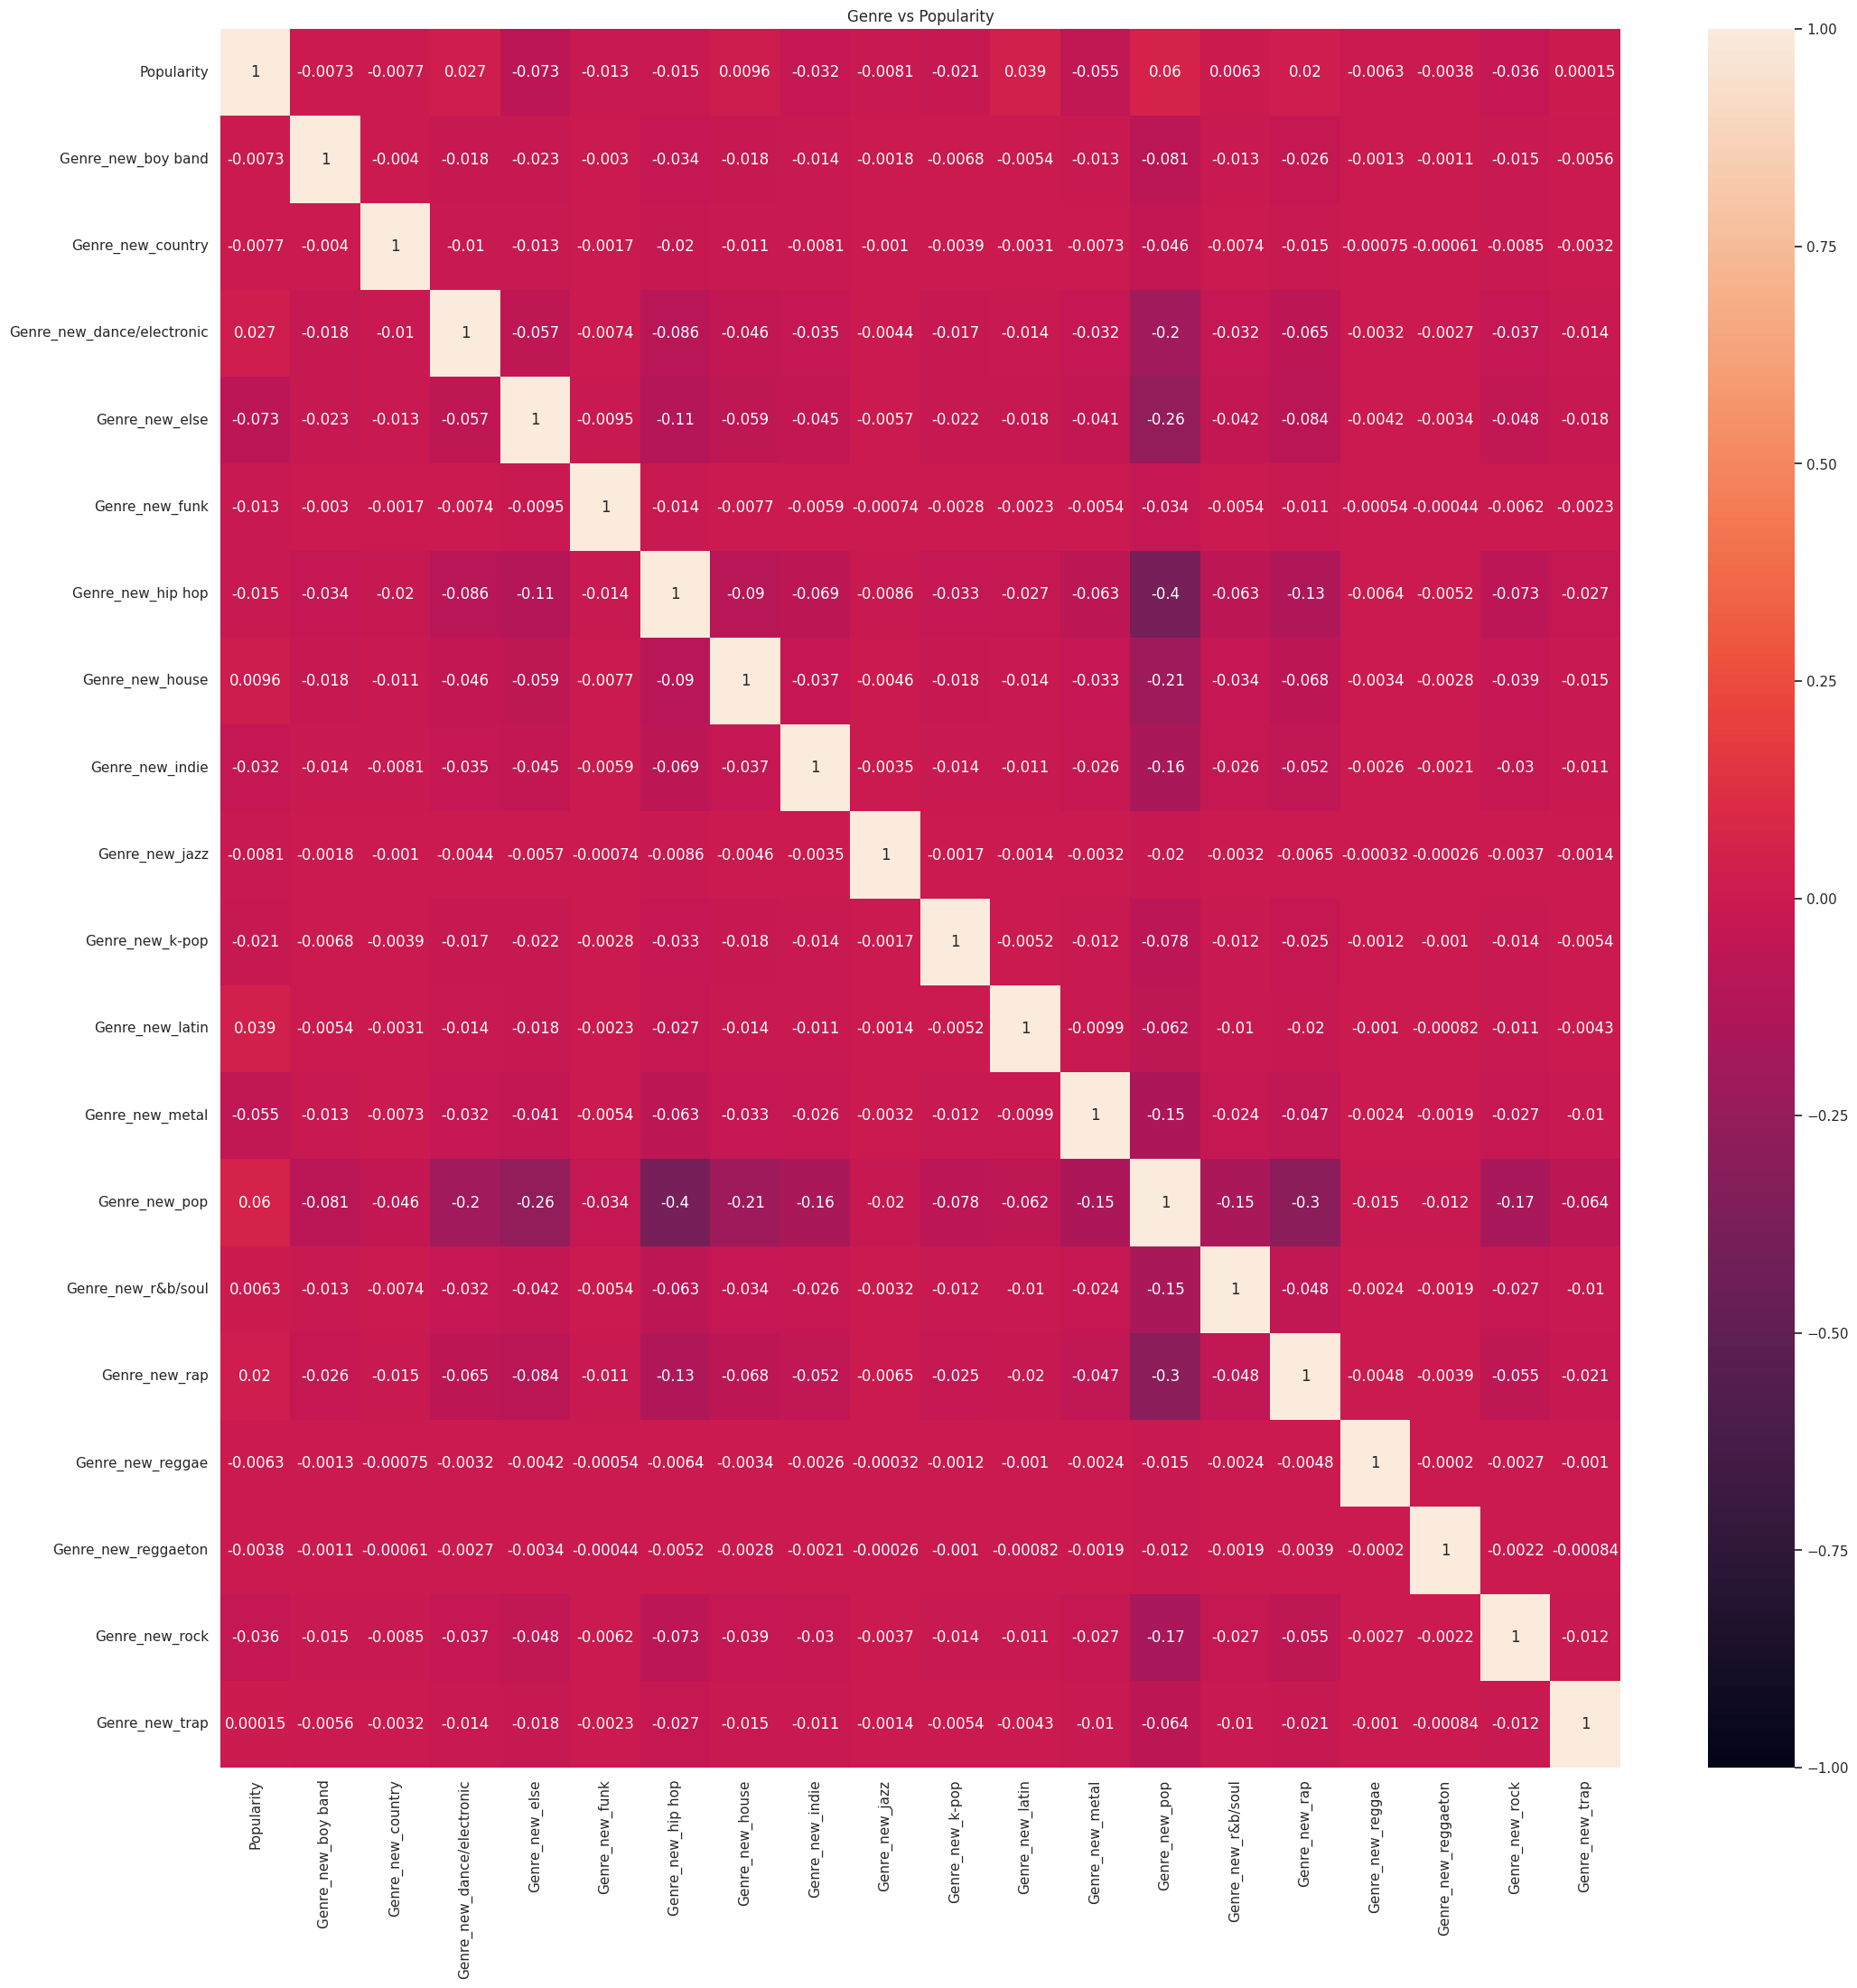

In [ ]:
#Creating an Calling the correlation matrix and setting the scale from -1 to +1.
correlations = df_genre_vs_popularity.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(correlations, vmin=-1 , vmax =1, annot=True).set(title='Genre vs Popularity')